<a href="https://colab.research.google.com/github/Boldurev16/Study/blob/master/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%91%D0%BE%D0%BB%D0%B4%D1%8B%D1%80%D0%B5%D0%B2_%D0%92_%D0%92_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание набора данных

Этот набор данных изначально получен из "Institute of Diabetes and Digestive and Kidney Diseases". Данные должны помочь определить при каких значениях праматров пацентов диагностирован диабет.
Было введено несколько ограничений
на выбор этих экземпляров из большей базы данных. В частности, все пациенты здесь — женщины, в возрасте от 21 года, индийского происхождения. 

Признак  | Описание
-------------------|--------------------
Pregnancies       | Количество беременностей
Glucose | Уровень глюкозы в крови 
BloodPressure  | Измерение артериального давления
SkinThickness      | Толщина кожи 
Insulin  | Уровень инсулина в крови
BMI | Индекс массы тела
DiabetesPedigreeFunction | Наследственная предрасположенность
Age | Возраст
Outcome | Диабет (не)дагностирован (0/1)





# Загрузка и предварительная обработка данных

Импортируем библиотеки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Загрузим данные в датафрейм 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Выведем основные характеристики данных для наглядности (потребуется при интерпретации результатов анализа)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Построим график boxplot, для наглядного отображения данных. Это позволит определить наличие выбросов.  

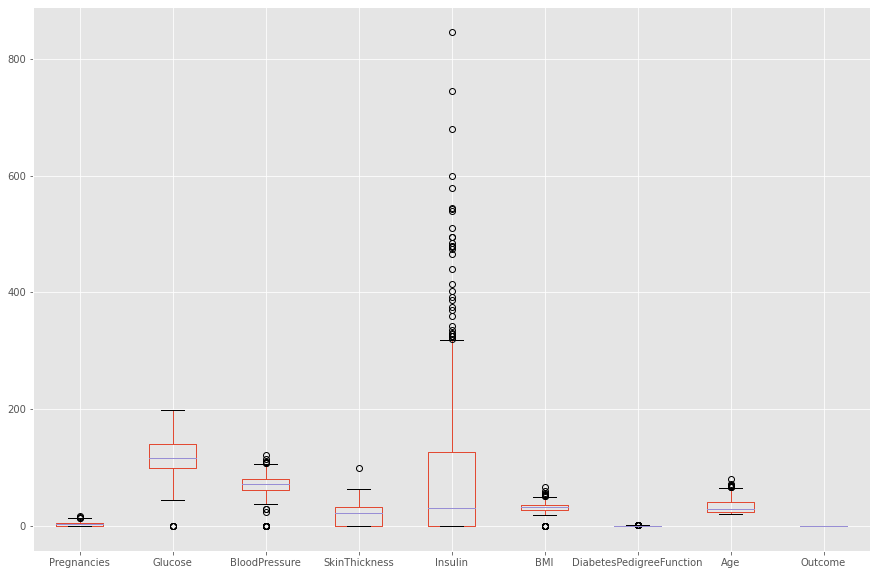

In [ ]:
df.boxplot(figsize=(15,10))

Удалим очевидные выбросы и представим визуализацию результатов.



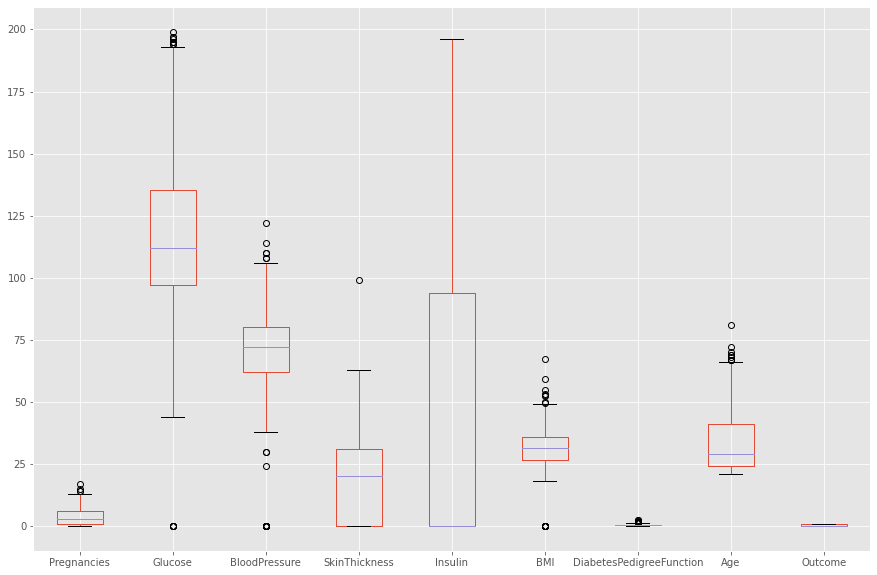

In [ ]:
clean_df = df[df['Insulin'] < 200]
clean_df.boxplot(figsize=(15,10))

Видно, что выбросы Insulin удалены (остальные выбросы не дают такого же значительного разброса значений). 

Так как, рассматриваемые числовые величины имеют разный порядок необходимо провести стандартизацию данных. Применим StandartScaler().

In [ ]:
standard_scaler = StandardScaler()
standard_df = pd.DataFrame(data = standard_scaler.fit_transform(clean_df), index = clean_df.index, columns = clean_df.columns)
standard_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.630084,1.003925,0.177950,1.011804,-0.776328,0.274588,0.535481,1.430747,1.439583
1,-0.846199,-1.051150,-0.121748,0.633700,-0.776328,-0.616701,-0.331994,-0.186112,-0.694646
2,1.220597,2.145633,-0.221647,-1.193802,-0.776328,-1.036881,0.676917,-0.101015,1.439583
3,-0.846199,-0.920669,-0.121748,0.255596,0.758343,-0.425711,-0.910311,-1.037091,-0.694646
4,-1.141456,0.645102,-1.420441,1.011804,1.966488,1.484194,5.756049,-0.015917,1.439583
...,...,...,...,...,...,...,...,...,...
763,1.811110,-0.529226,0.377749,1.831029,2.162404,0.185459,-0.897739,2.537019,-0.694646
764,-0.550943,0.155799,0.078051,0.507665,-0.776328,0.682034,-0.366568,-0.526504,-0.694646
765,0.334827,0.123179,0.177950,0.255596,1.052216,-0.667632,-0.665155,-0.271210,-0.694646
766,-0.846199,0.286280,-0.421446,-1.193802,-0.776328,-0.171057,-0.338280,1.175453,1.439583


Для нашего эксперимента предложено анализировать данные столбцов Glucose и BMI для подтверждения гипотезы «отклонения значений показателя глюкозы в крови и индекса массы тела от нормы могут привести к диагнозу - диабет. 

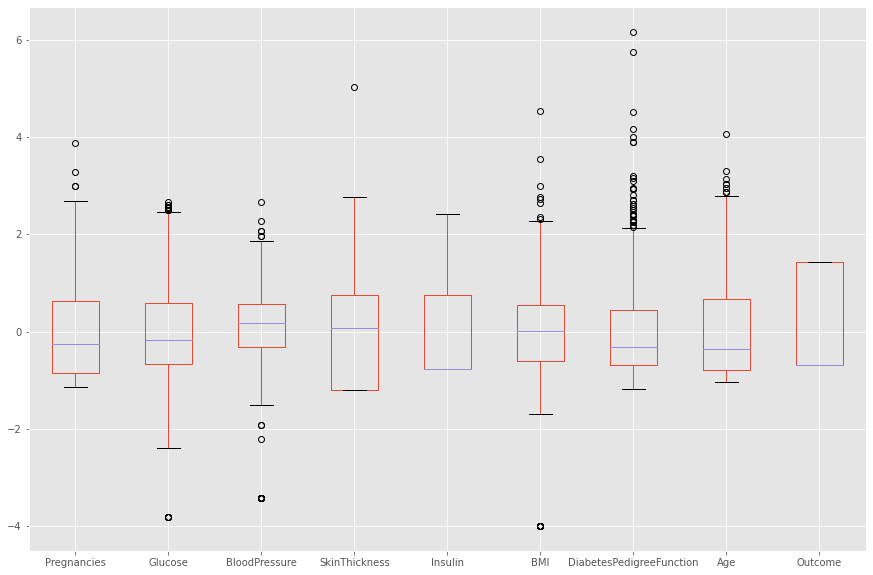

In [ ]:
standard_df.boxplot(figsize=(15,10))

Мы видим, что значения этих столбцов примерно одного порядка. 

# Постановка задачи и построение модели

Наша задача — выяснить существует ли зависимость между параметрами Outcome, Glucose и BMI. И если зависимость существует, то на какие кластеры можно разделить эти данные.


Для проведения кластеризации будем использовать метод k-means. Предположим, что будет достаточно от 1 до 15 кластеров для формирования подтверждения или опровержения сформулированной гипотезы на основе данных.

In [ ]:
final_df = clean_df.copy()

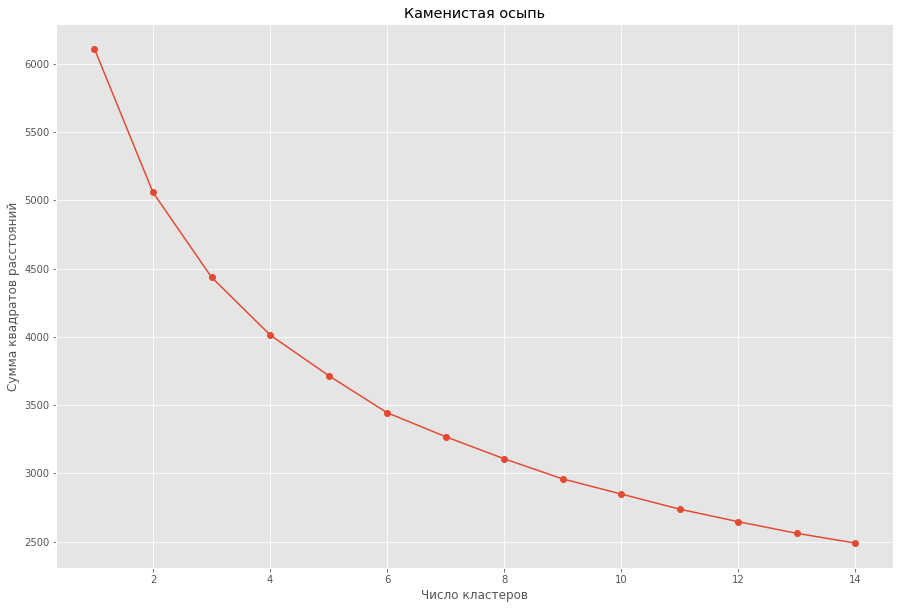

In [ ]:
K = range(1, 15)
models = [KMeans(n_clusters = k, random_state = 111, n_init = 100, max_iter = 10000).fit(standard_df) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

По графику видно, что имеет смысл рассмотреть диапазон от 2 до 7 кластеров. Далее излом не такой большой, а значит большее количество кластеров можно не брать в расчет.

Произведем кластеризацию для каждого случая и визуализируем полученные результаты.

               Glucose        BMI   Outcome
2_clusters                                 
0           137.648936  33.803546  0.687943
1           102.715365  29.767003  0.068010


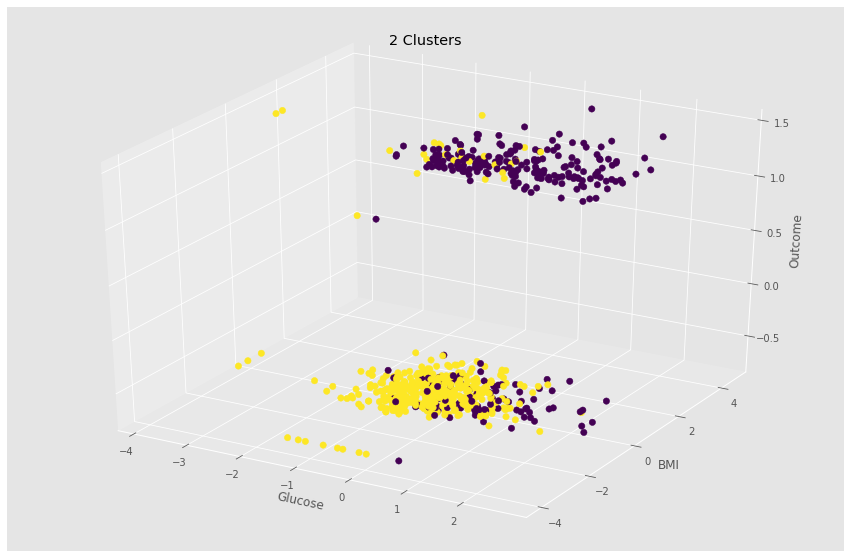

               Glucose        BMI   Outcome
3_clusters                                 
0           134.463918  32.800000  0.608247
1           122.971014  35.391787  0.400966
2           100.913669  27.556835  0.071942


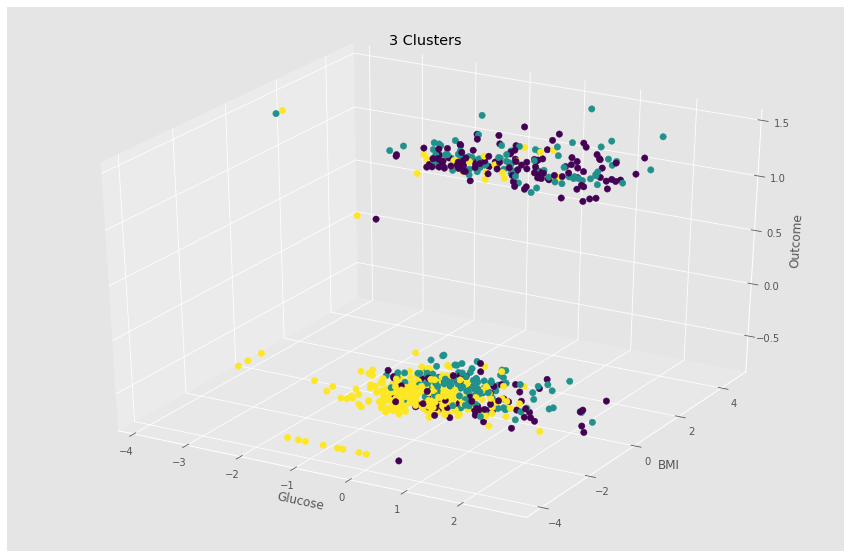

               Glucose        BMI   Outcome
4_clusters                                 
0           132.468085  32.176064  0.574468
1            99.171617  29.466337  0.029703
2           134.111111  35.771242  0.575163
3           117.800000  25.705714  0.457143


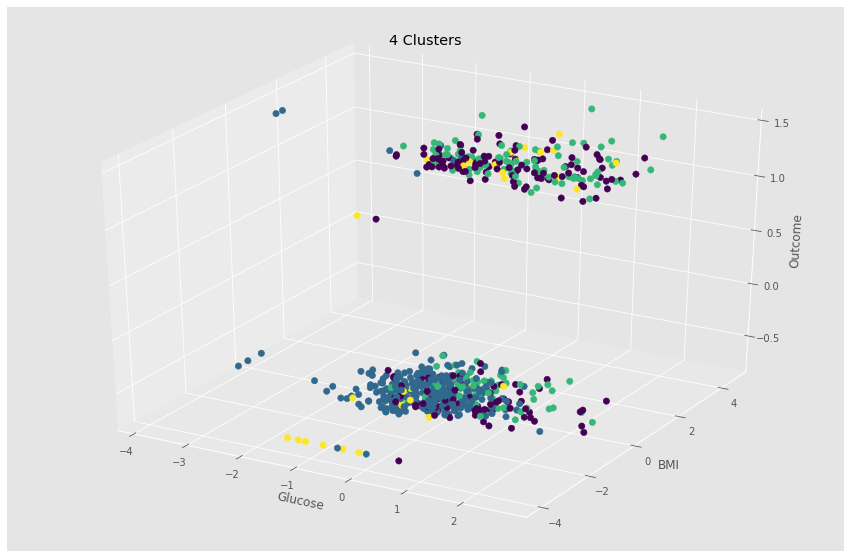

               Glucose        BMI   Outcome
5_clusters                                 
0           111.918919  33.684459  0.006757
1            98.813333  28.140444  0.044444
2           140.222222  36.393519  0.981481
3           132.092025  31.920245  0.539877
4           117.800000  25.705714  0.457143


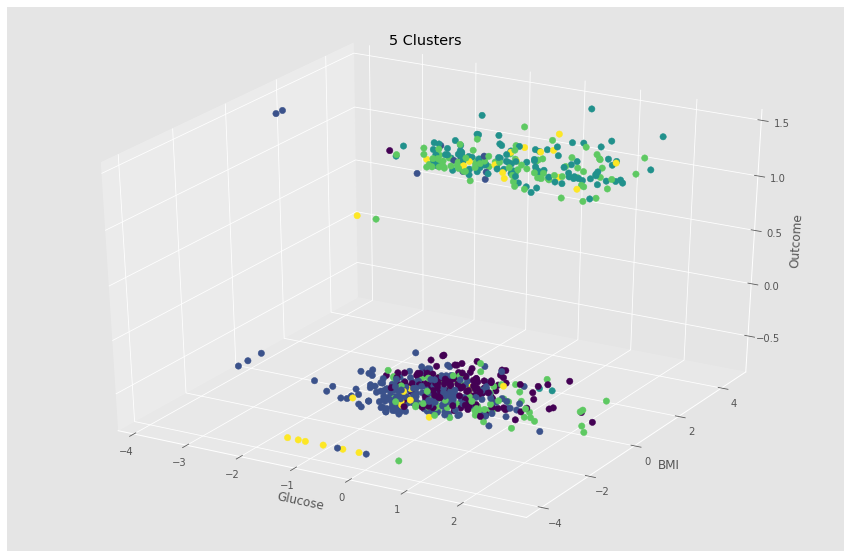

               Glucose        BMI   Outcome
6_clusters                                 
0           140.333333  34.595614  0.973684
1           116.063158  29.924211  0.021053
2           106.262857  34.268000  0.057143
3           117.800000  25.705714  0.457143
4           143.574713  35.237931  0.931034
5           100.352601  26.595954  0.005780


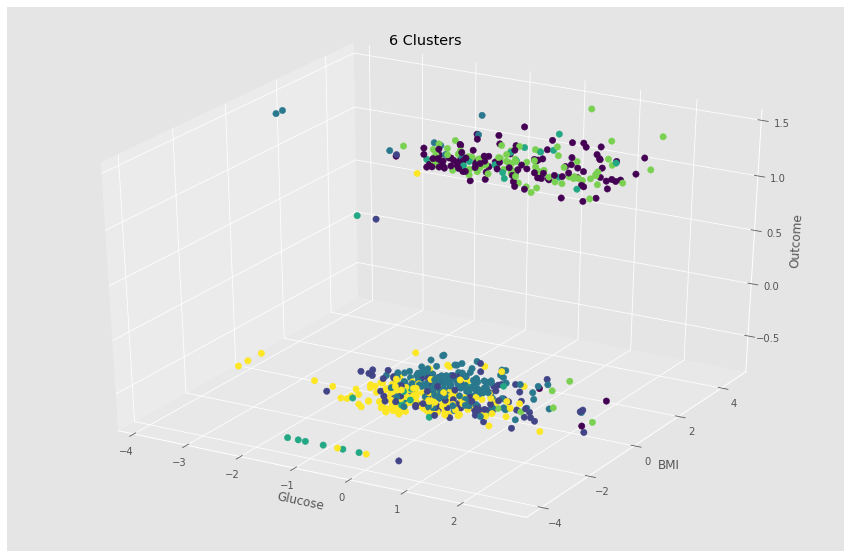

In [ ]:
for i in range(2,7):
  model = KMeans(n_clusters = i, random_state = 111, n_init = 100, max_iter = 10000)
  model.fit(standard_df)

  final_df[f'{i}_clusters'] = model.labels_
	
  print(final_df.groupby(f'{i}_clusters')[['Glucose',	'BMI', 'Outcome']].mean())

  threedee = plt.figure(figsize=(15,10)).gca(projection='3d')
  threedee.scatter(standard_df["Glucose"], standard_df["BMI"], standard_df["Outcome"],  c = final_df[f'{i}_clusters'], alpha = 1, s =40)
  threedee.set_xlabel('Glucose')
  threedee.set_ylabel('BMI')
  threedee.set_zlabel('Outcome')
  threedee.set_title(f'{i} Clusters')
  plt.show()

Эмпирически предположим, что разбиения на 4, 5, 6 кластеров являются наиболее удачными и интерпретируемыми. При укрупненном рассмотрении сложно сформулировать обоснованный вывод. Далее перейдем для формулировки интерпретации.

# Результаты и выводы

Приведем нормальные назначения для исследуемого набора данных и сравним с ними значения, полученные в результате разделения на кластеры.

Параметр  | Среднее значение (будем считать за норму для пациентов предоставивших эти данные)
-------------------|--------------------
Glucose (Уровень глюкозы в крови ) | 120
BMI (Индекс массы тела) | 32

In [ ]:
final_df.groupby('4_clusters')[['Glucose',	'BMI', 'Outcome']].mean()

,Glucose,BMI,Outcome
4_clusters,,,
0,132.468085,32.176064,0.574468
1,99.171617,29.466337,0.029703
2,134.111111,35.771242,0.575163
3,117.800000,25.705714,0.457143


При разбиении на четыре кластера, интерпретация следующая: 

*   Нулевой кластер — это пациенты уровень глюкозы, которых значительно превышает норму и нормальный индекс массы тела (у таких пациентов в 57% случаев может быть диагностирован диабет).

*   Первый кластер — это пациенты уровень глюкозы, которых значительно ниже нормы и недостаточный индекс массы тела (у таких пациентов только в 2 % случаев может быть диагностирован диабет).

*   Второй кластер — (практически совпадает с нулевым кластером) это пациенты уровень глюкозы, которых значительно превышает норму и индекс массы тела с незначительным превышением нормы (как и пациентов, относящихся к нулевому кластеру в 57% случаев, может быть диагностирован диабет).

*   Третий кластер — это пациенты уровень глюкозы, которых ниже нормы и   индекс массы тела существенно ниже нормы (такие пациенты в 45% случаев могут получить диагноз - диабет).



In [ ]:
final_df.groupby('5_clusters')[['Glucose',	'BMI', 'Outcome']].mean()


,Glucose,BMI,Outcome
5_clusters,,,
0,111.918919,33.684459,0.006757
1,98.813333,28.140444,0.044444
2,140.222222,36.393519,0.981481
3,132.092025,31.920245,0.539877
4,117.800000,25.705714,0.457143


При разбиении на пять кластеров, интерпретация следующая: 

*   Нулевой кластер — отображает данные пациентов с наименьшим количеством случаев постановки диагноза диабет (то есть при пониженном уровне глюкозы и незначительно превышении индекса массы тела) 

*   Первый кластер — практически совпадает с первым кластером из разбиения на 4 кластера (это пациенты уровень глюкозы, которых значительно ниже нормы и недостаточный индекс массы тела).

*   Второй кластер — это пациенты уровень глюкозы, которых сильно превышает норму и повышен индекс массы тела (у таких пациентов в 98% случаев может быть диагностирован диабет).

*   Третий кластер — похож на второй кластер из предыдущего анализа с незначительной разницей в меньшую сторону параметров уровня глюкозы и индекса массы тела (заметим, что также до 53% уменьшается количество случаев диагностирования диабета). Этот кластер указывает на возможность существования зависимости между уровнем глюкозы и индексом массы тела при диагностировании диабета.

*   Четвертый кластер — аналогичен третьем кластеру из предыдущего разбиения.



In [ ]:
final_df.groupby('6_clusters')[['Glucose',	'BMI', 'Outcome']].mean()


,Glucose,BMI,Outcome
6_clusters,,,
0,140.333333,34.595614,0.973684
1,116.063158,29.924211,0.021053
2,106.262857,34.268000,0.057143
3,117.800000,25.705714,0.457143
4,143.574713,35.237931,0.931034
5,100.352601,26.595954,0.005780


При разбиении на шесть кластеров, интерпретация следующая: 

*   Нулевой кластер — практически совпадает со вторым кластером из разбиения на 4 кластера.

*   Первый кластер — можно сравнить с первым кластером перового и второго разбиения. 
Это пациенты уровень глюкозы, которых значительно ниже нормы и недостаточный индекс массы тела (у таких пациентов только в 2-4 % случаев может быть диагностирован диабет).

*   Второй кластер — это пациенты уровень глюкозы, которых ниже нормы и повышенный индекс массы тела (у таких пациентов в 57% случаев может быть диагностирован диабет). 

*   Третий кластер — практически аналогичен четвёртому кластеру из предыдущего разбиения и соответственно третьему кластеру из первого разбиения.

*   Четвертый кластер — похож на второй кластер второго разбиения.

*   Пятый кластер — похож на первый кластер и текущего разбиения и соответственно на кластеры из второго и третьего разбиения.  



# Заключение

В ходе проведенного анализа набора данных были выделены следующие кластеры:

1. Это пациенты уровень глюкозы, которых значительно превышает норму и 
нормальный индекс массы тела (у таких пациентов в 57% случаев может быть диагностирован диабет);
2. Это пациенты уровень глюкозы, которых ниже нормы и повышенный индекс массы тела (у таких пациентов в 57% случаев может быть диагностирован диабет)
3. Это пациенты уровень глюкозы, которых значительно ниже нормы и недостаточный индекс массы тела (у таких пациентов только в 2-4 % случаев может быть диагностирован диабет);
4. Это пациенты уровень глюкозы, которых ниже нормы и   индекс массы тела существенно ниже нормы (такие пациенты в 45% случаев могут получить диагноз - диабет);
5. Это пациенты уровень глюкозы, которых сильно превышает норму и повышен индекс массы тела (у таких пациентов в 98% случаев может быть диагностирован диабет);


Отметим, что:

- Значительное превышение относительно нормы показателей уровеня глюкозы в крови и индекса массы тела приводит к диагнозу диабет. 

- Значительная недостаточность относительно нормы показателей уровеня глюкозы в крови и индекса массы тела не приводит к диагнозу диабет.

- Подтвердить гепотезу о наличии зависимости между выбранными параметрами не удалось поскольку уникальные кластеры 1 и 2 характеризуются взаимоисключающими комбинациями параметров, но при этом обе комбинации приводят в диагнозу диабет в 57% случаев.

